In [124]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import torchvision

In [ ]:
plt.axis('off')

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [35]:
def convert_to_color(color_list):
      r, g, b = color_list[0], color_list[1], color_list[2]
      r = torch.ones((32, 32))*r
      g = torch.ones((32,32))*g
      b = torch.ones((32, 32))*b

      y = torch.stack([r, g, b]).permute(1, 2, 0)
      y = (y - y.min())/(y.max() - y.min())
      return y

In [82]:
data_matrix = np.array([
      [0, 2, 3], # red channel
      [0, 1, 0], # Green channel
      [0, 0, 1]  # Blue channel
])

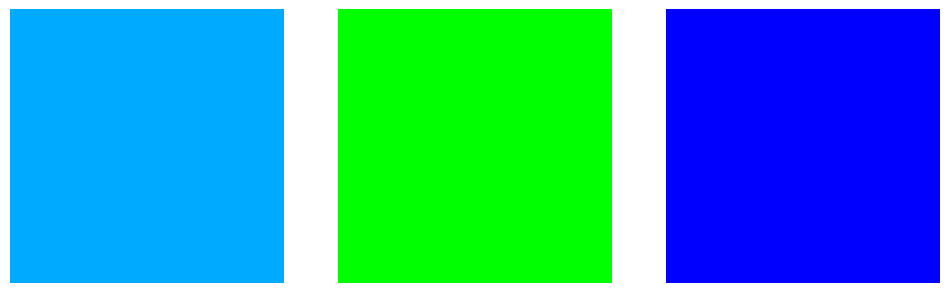

In [83]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
for i in range(3):
      ax[i].imshow(convert_to_color(data_matrix[i]))
      ax[i].set_axis_off()

In [84]:
def generate_linearly_dependent_record(weights):
      return data_matrix[0]*weights[0]+data_matrix[1]*weights[1]+data_matrix[2]*weights[2]

In [85]:
def generate_random_weights(bias=None, val1 = None):
      if not val1:
            val1 = np.random.random()
      w = np.random.random()
      val2 = (1 - val1)*w
      val3 = (1 - val1)*(1-w)
      if bias:
            val1 *= bias[0]
            val2 *= bias[1]
            val3 *= bias[2]
      return val1, val2, val3

(0.29279694787050803, 0.457047504004666, 0.250155548124826)

In [87]:
r_values = np.linspace(0.1, 0.9, 40)
rowspace = [generate_linearly_dependent_record(generate_random_weights( val1 = r_values[i] )) for i in range(40)]

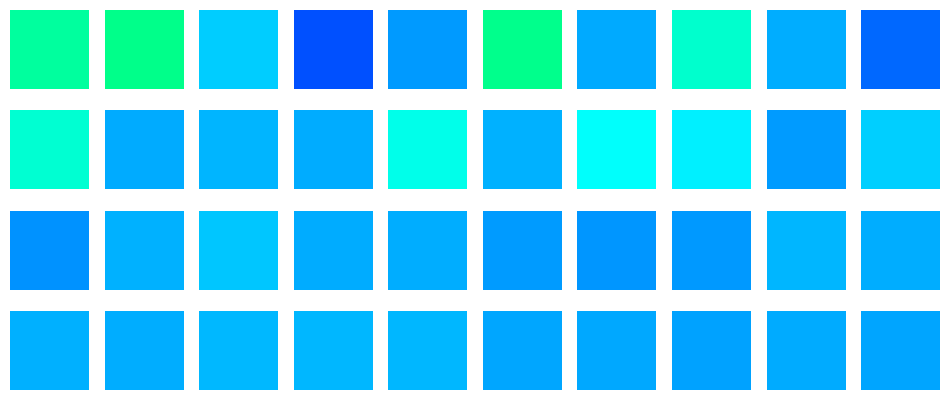

In [88]:

fig, ax = plt.subplots(4, 10, figsize = (12,5) )
for i in range(10):
      ax[0, i].imshow(convert_to_color(rowspace[i]))
      ax[0, i].set_axis_off()
      ax[1, i].imshow(convert_to_color(rowspace[10+i]))
      ax[1, i].set_axis_off()
      ax[2, i].imshow(convert_to_color(rowspace[20+i]))
      ax[2, i].set_axis_off()
      ax[3, i].imshow(convert_to_color(rowspace[30+i]))
      ax[3, i].set_axis_off()


In [127]:
img = torchvision.io.read_image("<img path>")

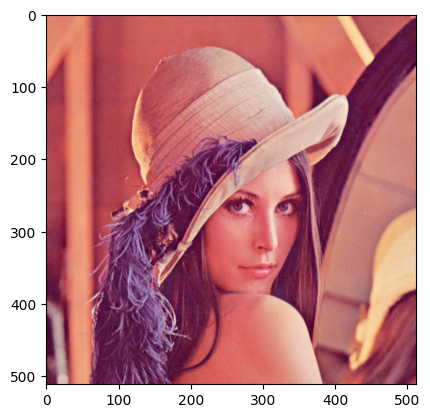

In [128]:
plt.imshow(img.permute(1, 2, 0))

Text(0.5, 1.0, 'Blue channel')

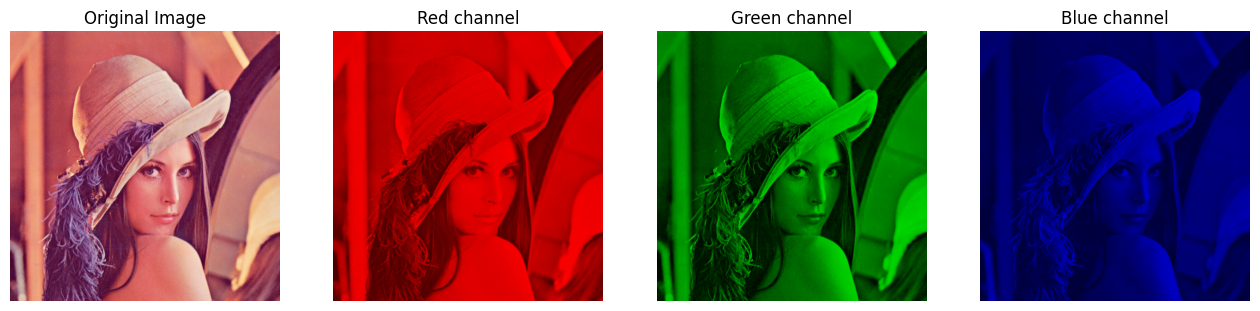

In [170]:
fig, ax  = plt.subplots(1, 4, figsize = (16, 12))
ax[0].imshow(img.permute(1, 2, 0))
ax[0].set_axis_off()
ax[0].set_title('Original Image')
ax[1].imshow(torch.stack([img[0], torch.zeros_like(img[0]), torch.zeros_like(img[0])]).permute(1, 2, 0))
ax[1].set_axis_off()
ax[1].set_title("Red channel")
ax[2].imshow(torch.stack([torch.zeros_like(img[0]), img[1], torch.zeros_like(img[0])]).permute(1, 2, 0))
ax[2].set_axis_off()
ax[2].set_title("Green channel")
ax[3].imshow(torch.stack([torch.zeros_like(img[0]), torch.zeros_like(img[0]), img[2]]).permute(1, 2, 0))
ax[3].set_axis_off()
ax[3].set_title("Blue channel")


In [141]:
def manipulate_channels(img, weights):
      ones = torch.ones_like(img, dtype=torch.float32)
      ones[0] *= weights[0]
      ones[1] *= weights[1]
      ones[2] *= weights[2]
      img = torch.mul(img, ones).permute(1, 2, 0)
      img = (img - img.min())/(img.max() - img.min())
      return img

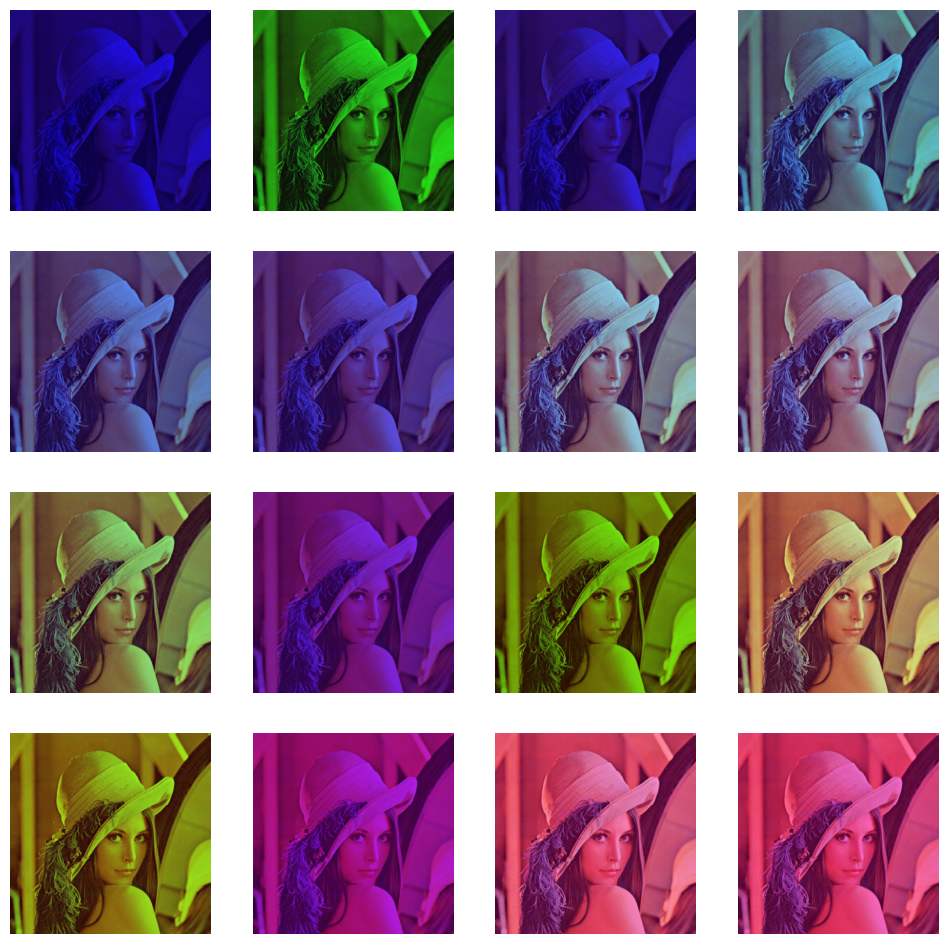

In [148]:
c_values = np.linspace(0.1, 0.9, 40)
colspace = [manipulate_channels(img, generate_random_weights( val1 = r_values[i] )) for i in range(16)]

fig, ax = plt.subplots(4, 4, figsize = (12,12) )
for i in range(4):
      ax[0, i].imshow(colspace[i])
      ax[0, i].set_axis_off()
      ax[1, i].imshow(colspace[4+i])
      ax[1, i].set_axis_off()
      ax[2, i].imshow(colspace[8+i])
      ax[2, i].set_axis_off()
      ax[3, i].imshow(colspace[12+i])
      ax[3, i].set_axis_off()
      

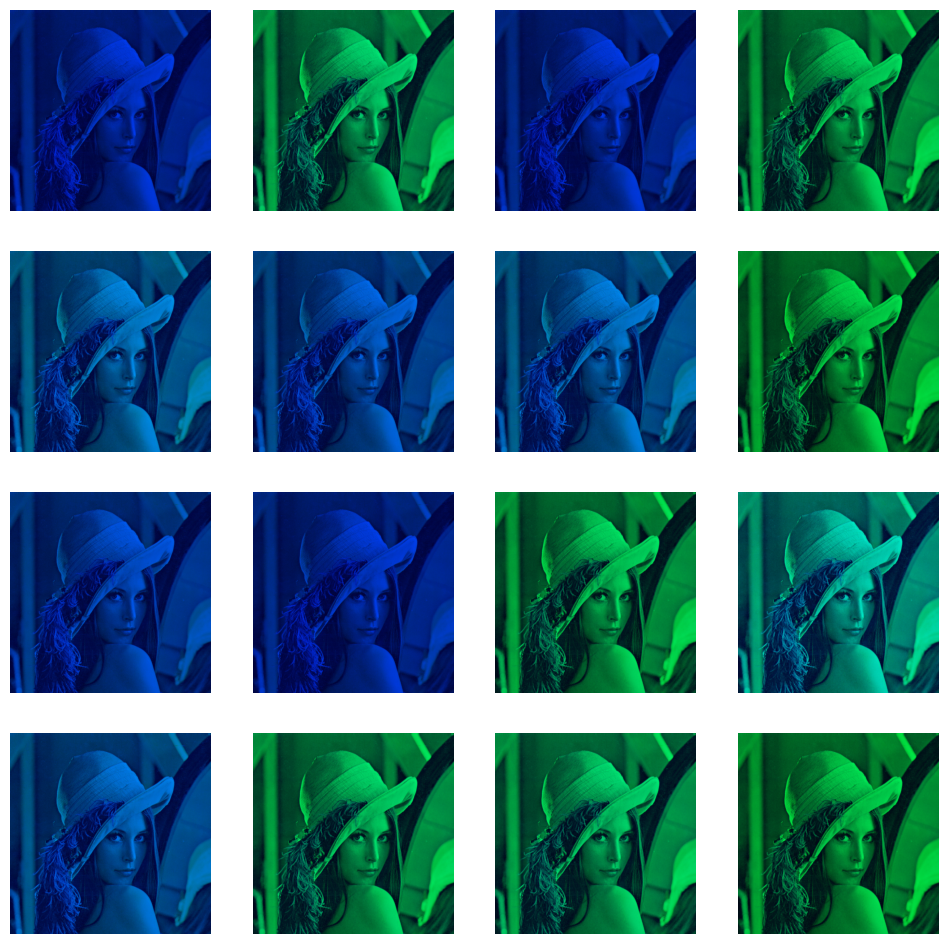

In [149]:
c_values = np.linspace(0.1, 0.9, 40)
colspace = [manipulate_channels(img, generate_random_weights( bias = [0, 1, 1], val1 = r_values[i] )) for i in range(16)]

fig, ax = plt.subplots(4, 4, figsize = (12,12) )
for i in range(4):
      ax[0, i].imshow(colspace[i])
      ax[0, i].set_axis_off()
      ax[1, i].imshow(colspace[4+i])
      ax[1, i].set_axis_off()
      ax[2, i].imshow(colspace[8+i])
      ax[2, i].set_axis_off()
      ax[3, i].imshow(colspace[12+i])
      ax[3, i].set_axis_off()

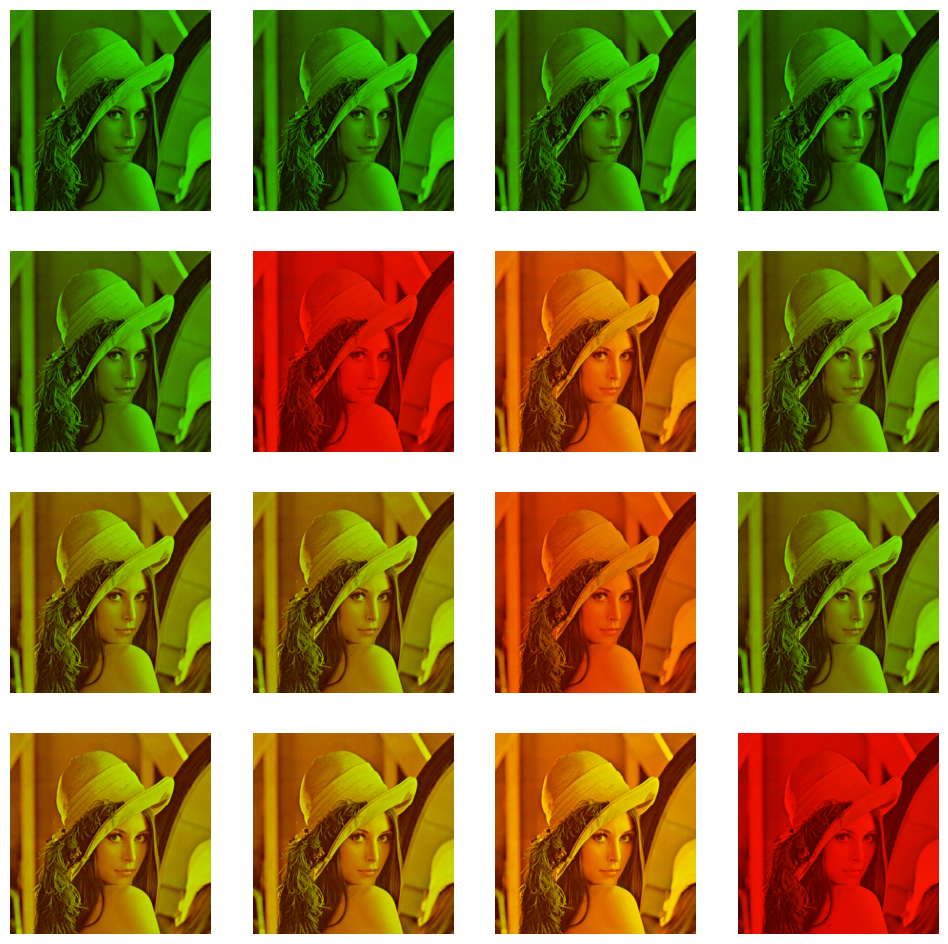

In [152]:
c_values = np.linspace(0.1, 0.9, 40)
colspace = [manipulate_channels(img, generate_random_weights( bias = [1, 1, 0], val1 = r_values[i] )) for i in range(16)]

fig, ax = plt.subplots(4, 4, figsize = (12,12) )
for i in range(4):
      ax[0, i].imshow(colspace[i])
      ax[0, i].set_axis_off()
      ax[1, i].imshow(colspace[4+i])
      ax[1, i].set_axis_off()
      ax[2, i].imshow(colspace[8+i])
      ax[2, i].set_axis_off()
      ax[3, i].imshow(colspace[12+i])
      ax[3, i].set_axis_off()

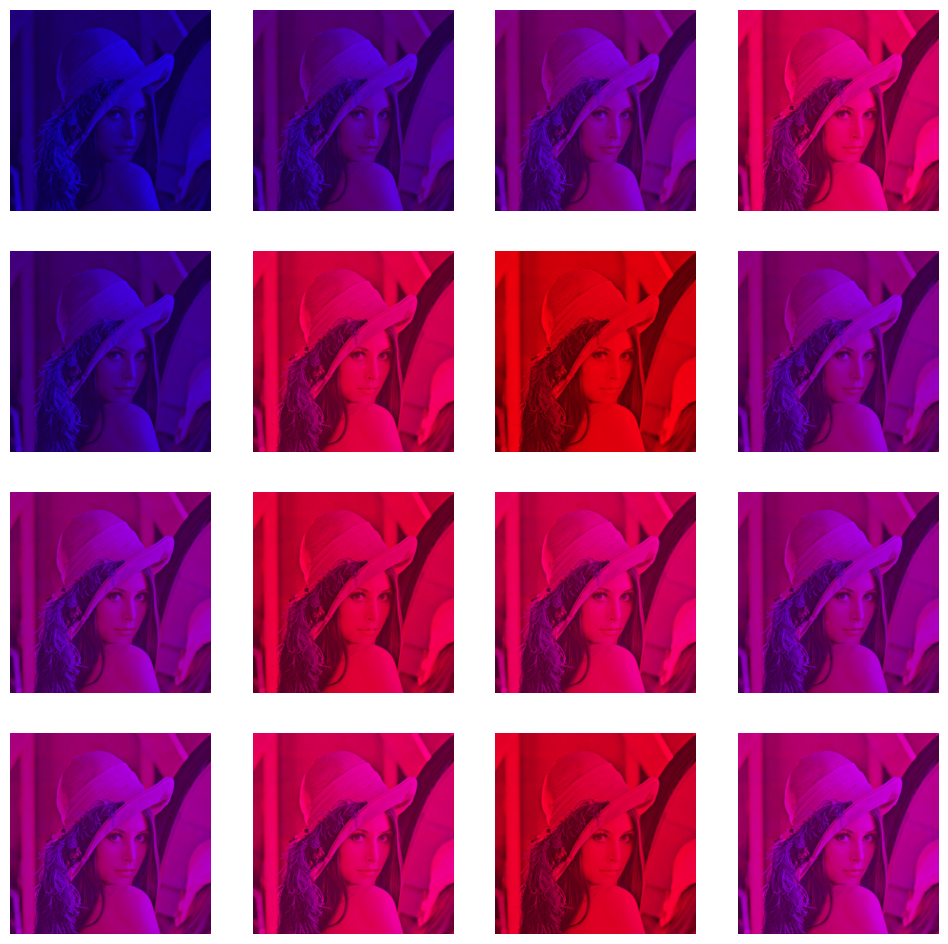

In [153]:
c_values = np.linspace(0.1, 0.9, 40)
colspace = [manipulate_channels(img, generate_random_weights( bias = [1, 0, 1], val1 = r_values[i] )) for i in range(16)]

fig, ax = plt.subplots(4, 4, figsize = (12,12) )
for i in range(4):
      ax[0, i].imshow(colspace[i])
      ax[0, i].set_axis_off()
      ax[1, i].imshow(colspace[4+i])
      ax[1, i].set_axis_off()
      ax[2, i].imshow(colspace[8+i])
      ax[2, i].set_axis_off()
      ax[3, i].imshow(colspace[12+i])
      ax[3, i].set_axis_off()